In [7]:
# pip install pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
# 데이터 복사본
welfare = raw_welfare.copy()

In [13]:
welfare # 앞부분, 뒷부분 출력
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [14]:
# 변수명 변경
welfare = welfare.rename(columns= {'h14_g3' : 'sex',
                                   'h14_g4' : 'birth',
                                   'h14_g10' : 'marriage_type',
                                   'h14_g11' : 'religion',
                                   'p1402_8aq1' : 'income',
                                   'h14_eco9' : 'code_job',
                                   'h14_reg7' : 'code_region'})
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [15]:
welfare['sex'].dtypes # 변수 타입 출력 

dtype('float64')

In [16]:
welfare['sex'].value_counts() # 빈도 출력 # 이상치 확인

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [17]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
# 결측치 확인
welfare['sex'].isna().sum()

0

In [18]:
# 성별 항목 이름 부여 (1이면 남자 아니면 여자)
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
# 빈도 출력
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

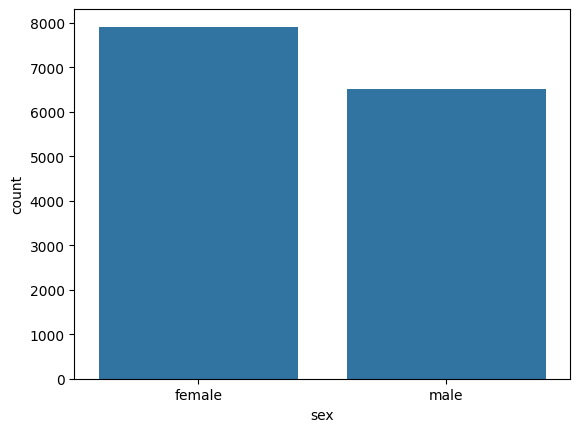

In [19]:
sns.countplot(data = welfare, x='sex')

In [20]:
welfare['income'].dtypes # 변수 타입 출력

dtype('float64')

In [21]:
welfare['income'].describe() # 요약 통계량

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

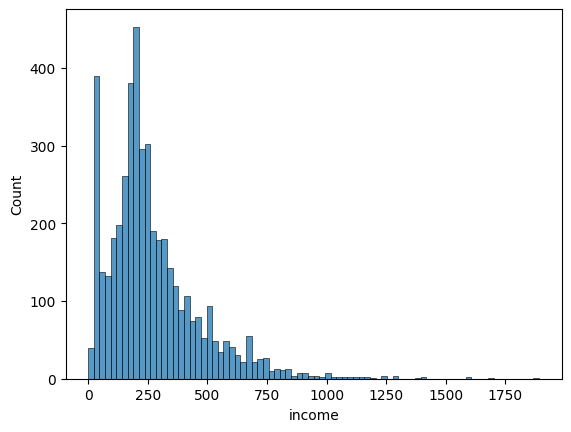

In [22]:
sns.histplot(data = welfare, x = 'income') # 히스토그램

In [23]:
welfare['income'].describe() # 이상치 확인

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [24]:
welfare['income'].isna().sum() # 결측치 확인

9884

In [25]:
## 성별 월급 평균표
sex_income = welfare.dropna(subset = ['income'])\
                    .groupby('sex', as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

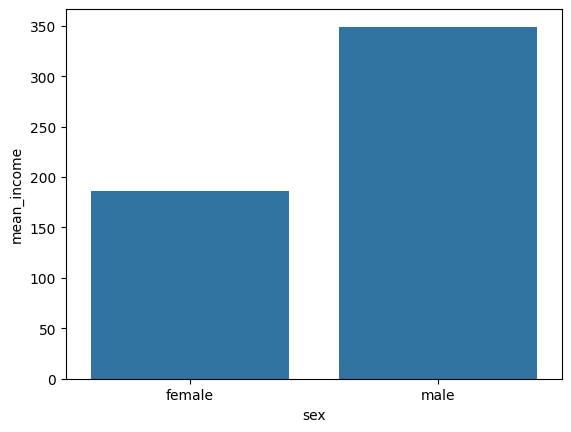

In [26]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

In [27]:
welfare['birth'].dtypes

dtype('float64')

In [28]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

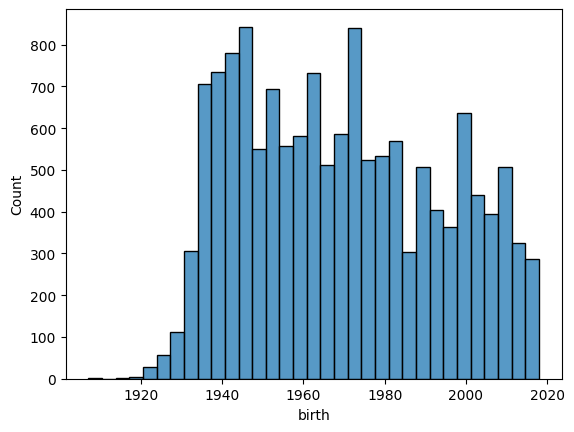

In [29]:
sns.histplot(data = welfare, x='birth')

In [30]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [31]:
welfare['birth'].isna().sum()

0

In [32]:
# 출생연도를 이용해 나이 파생변수 지정
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

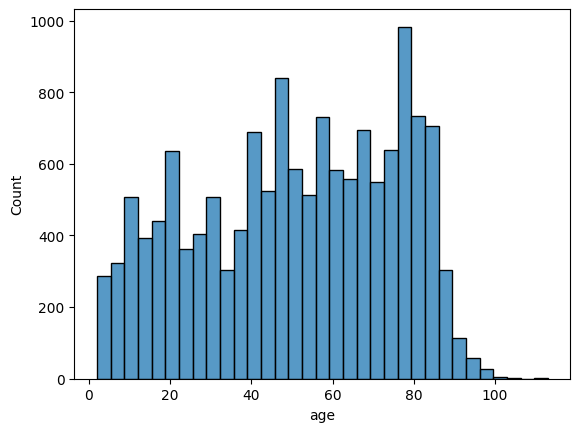

In [33]:
sns.histplot(data = welfare, x='age')

In [34]:
age_income = welfare.dropna(subset=['income'])\
                    .groupby('age')\
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

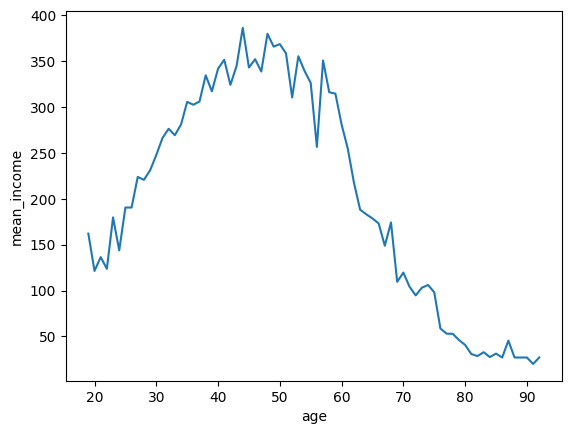

In [35]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [36]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [37]:
# 연령대 파생변수 만들기
## 중첩 where 문
welfare = welfare.assign(age_g = np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle', 'old')))
welfare['age_g'].value_counts()

age_g
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='age_g', ylabel='count'>

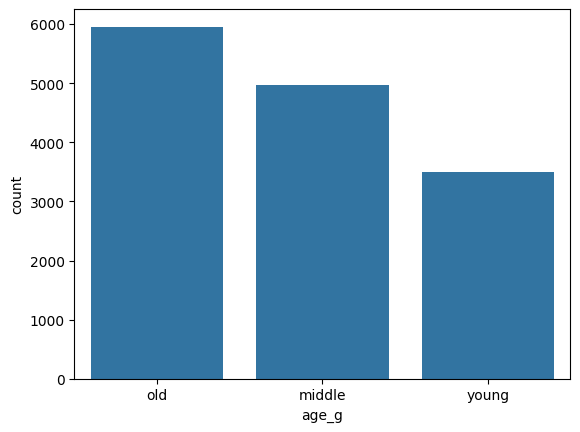

In [38]:
sns.countplot(data=welfare, x='age_g')

In [39]:
# 연령대 별 월급
age_g_income = welfare.dropna(subset=['income'])\
                    .groupby('age_g', as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
age_g_income.head()

,age_g,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='age_g', ylabel='mean_income'>

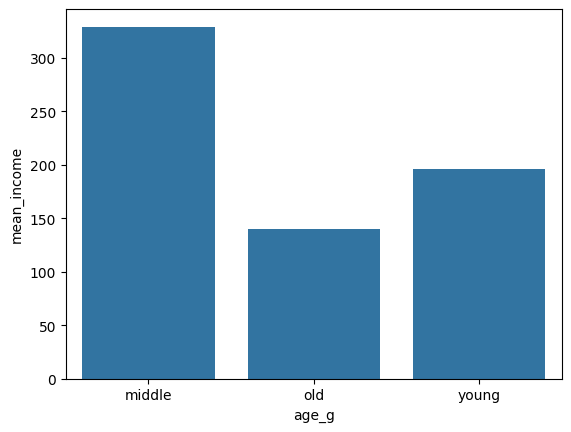

In [40]:
sns.barplot(data=age_g_income, x='age_g', y='mean_income')

<Axes: xlabel='age_g', ylabel='mean_income'>

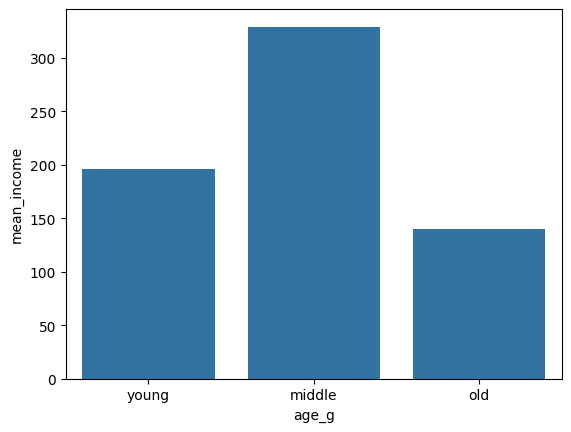

In [41]:
# 연령대 별로 막대그래프 정렬
sns.barplot(data=age_g_income, x='age_g', y='mean_income', order=['young', 'middle', 'old'])

In [42]:
# 연령대 및 성별 월급 평균표
sex_income = welfare.dropna(subset=['income'])\
                    .groupby(['age_g', 'sex'], as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income

,age_g,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='age_g', ylabel='mean_income'>

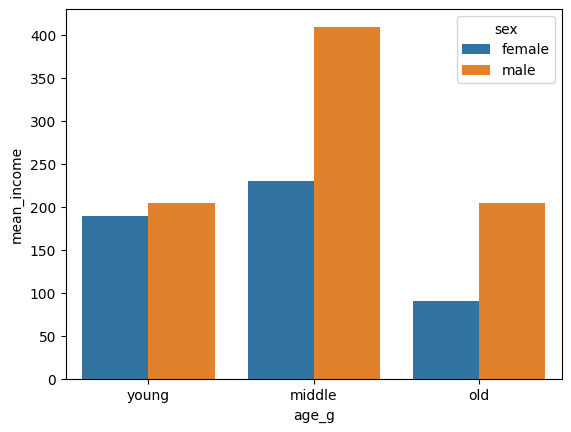

In [43]:
sns.barplot(data=sex_income, x='age_g', y='mean_income', hue='sex', order=['young','middle','old'])

In [44]:
# 나이 및 성별 월급 평균표
sex_age = welfare.dropna(subset=['income'])\
                    .groupby(['age', 'sex'], as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

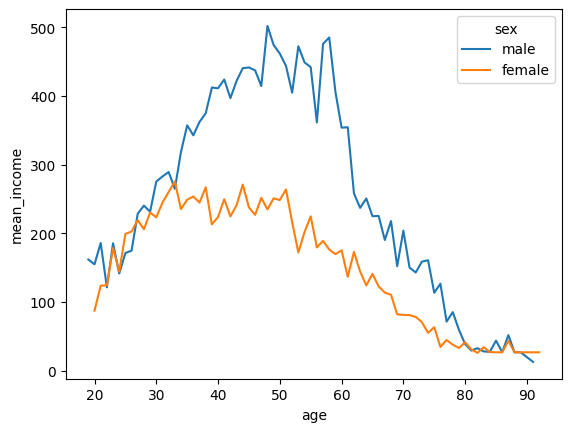

In [45]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [46]:
welfare['code_job'].dtype

dtype('float64')

In [47]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [48]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [49]:
list_job.shape

(156, 2)

In [50]:
# welfare에 list_job 결합
welfare = welfare.merge(list_job, how = 'left', on='code_job')
# code_job의 결측치 제거 후 출력
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [51]:
# 직업별 월급 평균표
job_income = welfare.dropna(subset=['job','income'])\
                    .groupby(['job'], as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [52]:
# 월급이 많은 직업
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='mean_income', ylabel='job'>

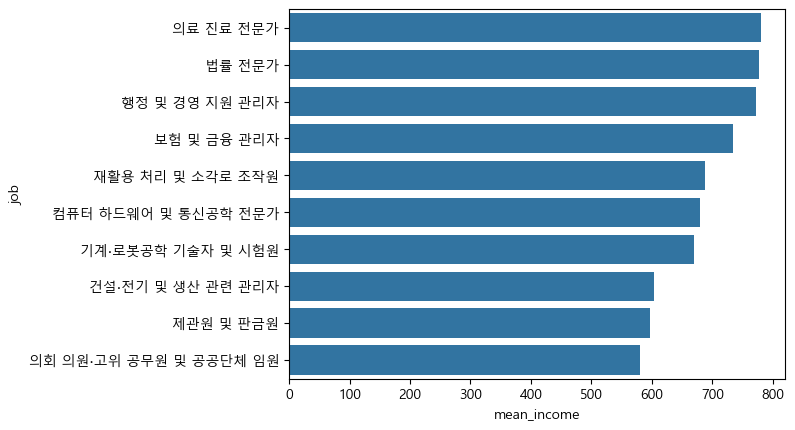

In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Malgun Gothic'})

sns.barplot(data = top10, y='job', x='mean_income')

In [54]:
bottom10 = job_income.sort_values('mean_income').head(10)

In [55]:
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

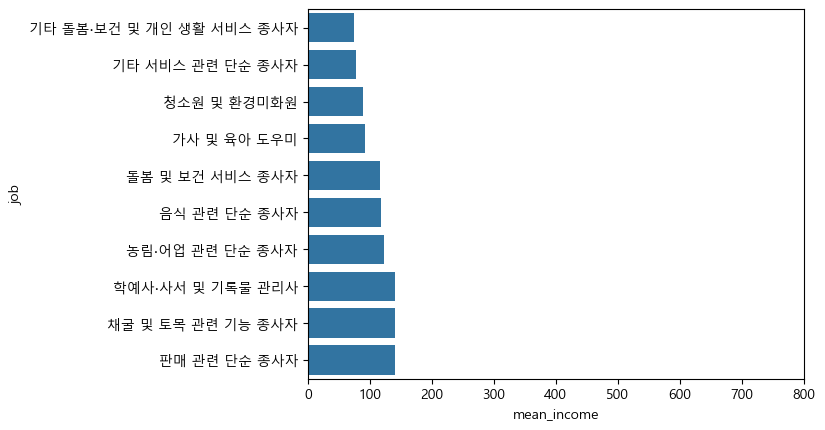

In [56]:
sns.barplot(data = bottom10, y='job', x='mean_income')\
    .set(xlim=[0,800])

In [57]:
# 9장 52페이지 부터
# merge - 행 병합
# stacked - 그래프를 쌓아서 한줄로 
# normalize - 개수를 비율로 표시

In [59]:
job_male = welfare.dropna(subset = ['job'])\
                  .query('sex == "male"')\
                  .groupby('job', as_index=False)\
                  .agg(n=('job', 'count'))\
                  .sort_values('n', ascending=False)\
                  .head(10)
job_male  

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [61]:
job_female = welfare.dropna(subset = ['job'])\
                  .query('sex == "female"')\
                  .groupby('job', as_index=False)\
                  .agg(n=('job', 'count'))\
                  .sort_values('n', ascending=False)\
                  .head(10)
job_female  

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97
